# Spotify Challenge - DavyDW - Unsupervised Learning

**Credits**
* Unsupervised Learning - KMeans : `Davy W.`


In [36]:
''' Linear Algebra'''
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

''' Data visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

''' Feature Engineering'''
from sklearn.preprocessing import MinMaxScaler

''' Cross Validation '''
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

''' Regression Algorithms'''
from sklearn.neighbors import KNeighborsRegressor

''' Unsupervised Learning'''
from sklearn.cluster import KMeans 

## The `Spotify Dataset`

In [2]:
spotify = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify.head()

name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280  143.783  
2    -9.803       0.0378   84.341  
3    -6.955       0.0610  174.005  
4   -13.095       0.0679   78.716

## Data visualization

፨ Visualize the correlation matrix (`PuRd` is a nice cmap choice)

In [3]:
spotify_num = spotify.select_dtypes(exclude = 'object')

spotify_num.head()

popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280  143.783  
2    -9.803       0.0378   84.341  
3    -6.955       0.0610  174.005  
4   -13.095       0.0679   78.716

<AxesSubplot:>

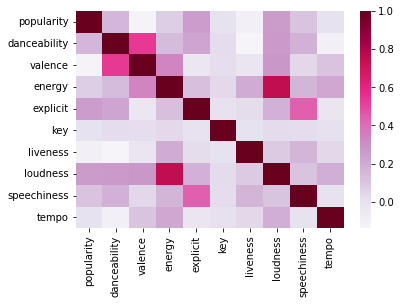

In [4]:
sns.heatmap(spotify_num.corr(), cmap="PuRd")

😮 Let's visualise a 3D-scatter-plot with 3 features with `plotly`

In [5]:
spotify_num.columns

Index(['popularity', 'danceability', 'valence', 'energy', 'explicit', 'key',
       'liveness', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [7]:
fig = px.scatter_3d(spotify_num, x = 'danceability', y='energy', z='speechiness')
fig.show()

😳 Not easy to sepearate these songs right ?

## Vanilla Kmeans clustering

### Baseline clustering

👀What if we could cluster our songs ? 
- Cluster with K-means algorithm
- Store your cluster labels

In [8]:
from sklearn.cluster import KMeans

# Instanciate K means
kmeans = KMeans(n_clusters = 8)

# Fit to numerical features
kmeans.fit(spotify_num)

# Store cluster labels
labels = kmeans.labels_

😮 Let's visualise a 3D-scatter-plot with 3 features with `plotly`, and the cluster labels as color

In [9]:
fig = px.scatter_3d(spotify_num, x = 'danceability', y='energy', z='speechiness', color = labels)
fig.show()

😭 It doesn't look good at all...

💡 MinMaxScaler before running our Kmeans which is a distance-based algorithm...

### Scaling + Clustering

- MinMaxScale the features
- Save scaled feature in new df
- Visualize correlation matrix

In [12]:
spotify_num.head()

popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280  143.783  
2    -9.803       0.0378   84.341  
3    -6.955       0.0610  174.005  
4   -13.095       0.0679   78.716

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Instanciate scaler
scaler = MinMaxScaler()

# Scale features
spotify_num_scaled = scaler.fit_transform(spotify_num)

spotify_num_scaled = pd.DataFrame(spotify_num_scaled, columns=spotify_num.columns)

spotify_num_scaled

popularity  danceability   valence  energy  explicit       key  \
0       0.255814      0.687627  0.561245   0.432       0.0  0.272727   
1       0.290698      0.462475  0.260040   0.368       0.0  0.545455   
2       0.244186      0.439148  0.836345   0.724       0.0  0.000000   
3       0.255814      0.442191  0.873494   0.914       0.0  0.454545   
4       0.267442      0.678499  0.566265   0.412       0.0  0.636364   
...          ...           ...       ...     ...       ...       ...   
9995    0.837209      0.797160  0.610442   0.808       0.0  0.636364   
9996    0.790698      0.727181  0.736948   0.753       0.0  0.636364   
9997    0.883721      0.643002  0.639558   0.858       0.0  0.363636   
9998    0.813953      0.680527  0.195783   0.623       1.0  0.181818   
9999    0.860465      0.868154  0.644578   0.721       1.0  0.636364   

      liveness  loudness  speechiness     tempo  
0       0.0727  0.774548     0.034901  0.524307  
1       0.1560  0.807362     0.029258  0.640639  
2       0.1700  0.821918     0.039498  0.375789  
3       0.8550  0.868551     0.063741  0.775296  
4       0.4010  0.768015     0.070951  0.350726  
...        ...       ...          ...       ...  
9995    0.0822  0.921815     0.092059  0.467967  
9996    0.1010  0.883860     0.063218  0.614587  
9997    0.2580  0.945983     0.084535  0.408524  
9998    0.6430  0.865178     0.321839  0.334415  
9999    0.1820  0.901741     0.112853  0.423241  

[10000 rows x 10 columns]

<AxesSubplot:>

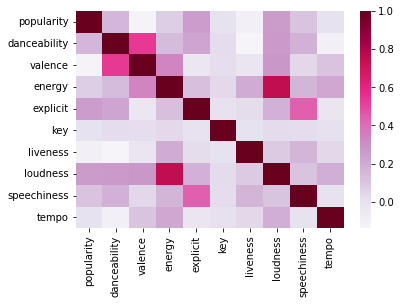

In [14]:
sns.heatmap(pd.DataFrame(spotify_num_scaled).corr(), cmap="PuRd")

Let's cluster our songs now that our data is scaled! Store your clusters in a new column.

In [15]:
from sklearn.cluster import KMeans

# Instanciate K means
kmeans = KMeans(n_clusters = 8)

# Fit to numerical features
kmeans.fit(spotify_num_scaled)

# Store cluster labels
labels = kmeans.labels_

🧪Okay, our songs'clustering look better even if we can't rival yet with the datascience team at Spotify!

😮 Let's visualise a 3D-scatter-plot with 3 features with `plotly`, and the new cluster labels as color

In [17]:
fig_scaled = px.scatter_3d(spotify_num_scaled,x='danceability',y='energy',z='speechiness',color=labels)
fig_scaled.show()

🤪 It's not bad, we can distinguish
1. "yellow/orange" songs
2. "blue" songs
3. "purple/pink" songs

### Scaling + PCA + KMeans

💡 What if we perform a PCA before running our clustering algorithm ?

- Run a PCA on the scaled features
- Visualize the principal components
- Plot explained variance vs # components

In [18]:
from sklearn.decomposition import PCA

# Instanciate PCA
pca = PCA()

# find all Principal Components PC (no y!)
spotify_num_scaled_pca = pca.fit_transform(spotify_num_scaled)

pca.explained_variance_ratio_

array([0.24071095, 0.22764878, 0.19852176, 0.12280218, 0.07401271,
       0.04834407, 0.03743676, 0.02720157, 0.01773376, 0.00558748])

We have 10 principal components which are linear combinations of the previous 10 features... 


For example:

$ X_1^{'} =\alpha_1 X_1 + \alpha_2 X_2 + ... + \alpha_9 X_9 + \alpha_{10} X_{10}$

with: 

$ \alpha_1 = 0.084012 $

...

$ \alpha_{10} = 0.047541$

In [19]:
pca.explained_variance_ratio_

array([0.24071095, 0.22764878, 0.19852176, 0.12280218, 0.07401271,
       0.04834407, 0.03743676, 0.02720157, 0.01773376, 0.00558748])

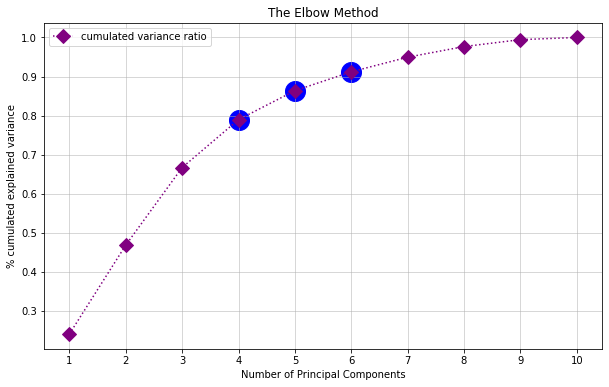

In [21]:
with plt.style.context('seaborn-deep'):
    
    # figsize
    plt.figure(figsize=(10,6))
    
    # getting axes
    ax = plt.gca()
    
    # plotting
    evr_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,evr_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,evr_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    
    
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(4,evr_cumulated[4-1],c='blue',s=400)
    ax.scatter(5,evr_cumulated[5-1],c='blue',s=400)
    ax.scatter(6,evr_cumulated[6-1],c='blue',s=400)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

👉 Re run a PCA with 6 components

In [22]:
from sklearn.decomposition import PCA

# Instanciate PCA
pca = PCA(n_components=6)

# find all Principal Components PC (no y!)
spotify_num_scaled_pca = pca.fit_transform(spotify_num_scaled)

Visualize the heatmap of the transformed features

<AxesSubplot:>

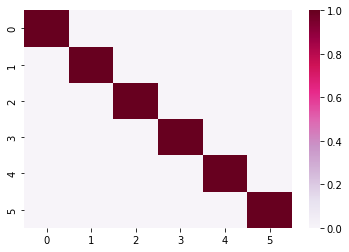

In [23]:
sns.heatmap(pd.DataFrame(spotify_num_scaled_pca).corr(),cmap='PuRd')

Train a new K-means clustering algorithm on the scaled and PCA transformed features

In [24]:
# Instanciate K means
k_means = KMeans(n_clusters = 8)

# Fit to scaled + transformed features
k_means.fit(spotify_num_scaled_pca)

# Store cluster labels
labels = k_means.labels_

😮 Let's visualise a 3D-scatter-plot with 3 features with `plotly`, and the new cluster labels as color

In [25]:
spotify_num_scaled_pca

array([[-0.19442497,  0.12583608, -0.10631268, -0.22918092,  0.00236727,
         0.06546329],
       [-0.29253153, -0.17790431,  0.16031877, -0.00525764, -0.0072593 ,
         0.11836946],
       [-0.11569375,  0.41764798, -0.36627701, -0.015298  ,  0.04731831,
         0.17767229],
       ...,
       [ 0.14462003,  0.1461394 , -0.1952423 ,  0.12659729, -0.17780178,
        -0.39340816],
       [ 0.39962864,  0.60416871,  0.80608734,  0.20515498,  0.26404563,
        -0.38201993],
       [ 0.824063  ,  0.24845426,  0.52124318, -0.20061855, -0.07426127,
        -0.24149292]])

In [27]:
fig_scaled = px.scatter_3d(spotify_num_scaled_pca ,x=0 ,y=1 ,z=2 , color=labels)

fig_scaled.show()

### Elbow Method - Optimizing # clusters 

In [28]:
# Apply the elbow method to find the optimal number of clusters.

Plot the elbow method

In [29]:
inertia = []
n_clusters = []

for k_clusters in range(1,21,1):
    
    print('working with ' + str(k_clusters) + ' clusters...', flush=True)
    
    kmeans = KMeans(n_clusters= k_clusters)
    
    kmeans.fit(spotify_num_scaled_pca)
    
    inertia.append(kmeans.inertia_)
    
    n_clusters.append(k_clusters)
    
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


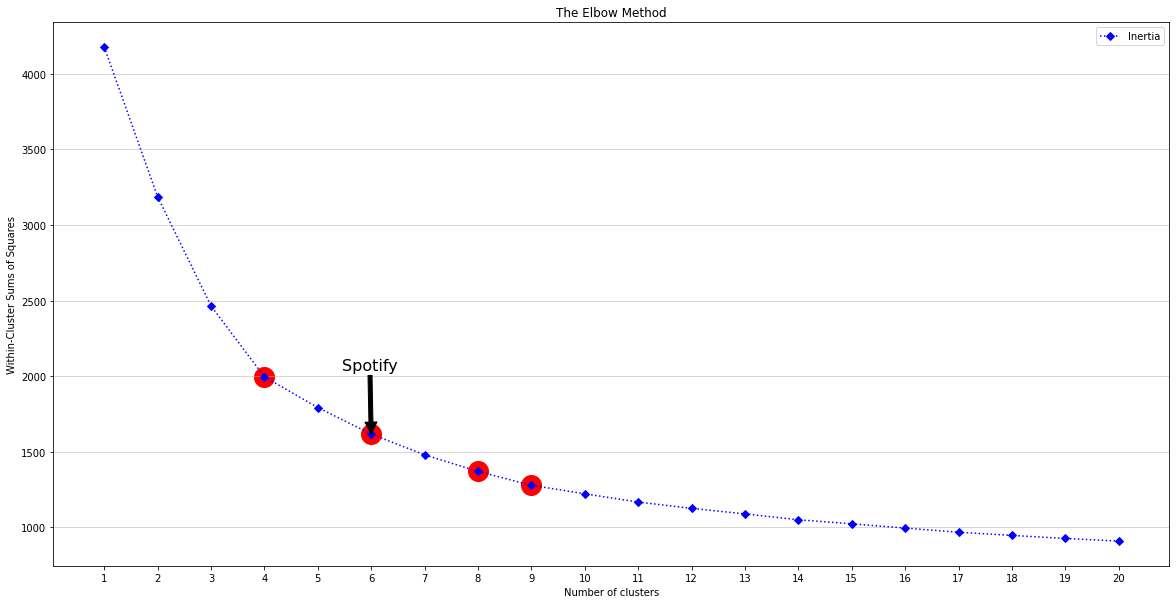

In [30]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(n_clusters, inertia,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(n_clusters)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    
    # focusing
    ax.scatter(4,inertia[4-1],c='red',s=400)
    ax.scatter(6,inertia[6-1],c='red',s=400)
    ax.scatter(8,inertia[8-1],c='red',s=400)
    ax.scatter(9,inertia[9-1],c='red',s=400)
    
    # annotate
    ax.annotate("Spotify", 
                (6,inertia[6-1]),
                (6+0.50,inertia[6-1]+500), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
                horizontalalignment='right', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### Spotify : 6 daily mixes

In [31]:
# Instanciate K means
k_means = KMeans(n_clusters = 6)

# Fit to scaled + transformed features
k_means.fit(spotify_num_scaled_pca)

# Store cluster labels
labels = k_means.labels_

😮 Let's visualise a 3D-scatter-plot with 3 features with `plotly`, and the new cluster labels as color

In [33]:
fig_scaled = px.scatter_3d(spotify_num_scaled_pca ,x=0 ,y=1 ,z=2 , color=labels)

fig_scaled.show()

Label the songs!

In [34]:
spotify['label'] = labels

spotify.head()

name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  label  
0   -12.696       0.0334  117.674      5  
1   -10.692       0.0280  143.783      0  
2    -9.803       0.0378   84.341      5  
3    -6.955       0.0610  174.005      1  
4   -13.095       0.0679   78.716      3

Generate 6 mixes made up of 5 random songs each, each belonging to the same cluster

In [35]:
for label in np.sort(spotify['label'].unique()):
    print(spotify[spotify.label == label].sample(n=5))

                                   name                   artists  popularity  \
1770                        Big Spender             ['Peggy Lee']          27   
7850                        Duck Or Ape                  ['Roar']          45   
3931                        Pray for Me  ['Mighty Clouds Of Joy']          26   
9767  Someday - triple j Like A Version         ['Julia Jacklin']          57   
4246                              Shine              ['Slowdive']          33   

      danceability  valence  energy  explicit  key  liveness  loudness  \
1770         0.796    0.572   0.215         0    6    0.1010    -9.409   
7850         0.326    0.523   0.482         0    9    0.1280   -10.229   
3931         0.419    0.113   0.546         0    8    0.4970   -11.331   
9767         0.567    0.265   0.235         0   11    0.0938   -13.570   
4246         0.115    0.185   0.604         0    9    0.1150    -8.974   

      speechiness    tempo  label  
1770       0.0726  111.157      